<a href="https://colab.research.google.com/github/ovozzx/Deep_Learning/blob/master/%5BDNN%5D_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston_Housing - Regression Analysis

## Import TensorFlow

DNN : 

- 입력층(input layer)과 출력층(output layer) 사이에 여러 개의 은닉층(hidden layer)들로 이뤄진 인공신경망(Artificial Neural Network, ANN)

- input에 대해서 ouput까지 Layer를 거치돼, input Layer 다음에 W랑 b가 있어서 Wx+b를 거치게 되고 hidden layer1 에서는 활성화 함수가 있다고 보면 됨

- 그 후 다시 Wx + b를 거치고 활성화 함수를 거친 후, output layer가 만약 분류였다면 마지막에는 softmax를 activation function(활성화 함수)을 활용

In [29]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [30]:
import tensorflow as tf

tf.__version__

'2.7.0'

* GPU 설정 Off

In [31]:
tf.test.gpu_device_name()

''

# I. Boston_Housing Data_Set Load & Review

> ## 1) Load Boston_Housing Data_Set


- 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측
총 데이터 : 506개 (404개는 훈련 샘플로, 102개는 테스트 샘플)

- 입력 데이터에 있는 각 특성feature(예를 들어 범죄율)은 스케일이 서로 다름
(어떤 값은 0과 1 사이의 비율을 나타내고, 어떤 것은 1과 12 사이의 값을 가지거나 1과 100 사이의 값을 나타냄)
 -> 정규화

In [32]:
from tensorflow.keras.datasets import boston_housing

df = boston_housing.load_data()
(train_data, train_targets), (X_test, y_test) =  boston_housing.load_data()

In [33]:
# 13개의 특성(1인당 범죄율, 주택당 평균 방의 개수, 고속도로 접근성 등)
df

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

> ## 2) Data_Set Information

In [34]:
print(train_data.shape) # train 13개의 특성, 404개
print(X_test.shape) # test 102 개

print(train_targets[:10]) # train 404개
print(y_test[:10]) # test 102 개


(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# II. Data Preprocessing

> ## 1) Standardization

 * train_data & test_data

In [35]:
# (값-평균)/표준편차
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data = train_data - mean
train_data = train_data / std

X_test = X_test - mean
X_test = X_test / std

> ## 2) Train & Validation Split

In [36]:
from sklearn.model_selection import train_test_split

# train 전체 404개 중에 나눔
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets,  #data -> X , target -> y
                                                      test_size = 0.2, 
                                                      random_state = 2045) 

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# III. Boston_Housing Keras Modeling

> ## 1) Model Define

In [37]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,))) #특성 13개 input
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

In [38]:
boston.summary()

Model: "Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [39]:
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 3) Model Fit

 * 약 4분

In [40]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 194.5447 - mae: 10.3105 - val_loss: 37.0641 - val_mae: 3.8962
Epoch 2/500
323/323 [==============================] - 1s 2ms/step - loss: 23.1140 - mae: 3.2934 - val_loss: 28.0002 - val_mae: 2.8643
Epoch 3/500
323/323 [==============================] - 1s 2ms/step - loss: 18.4093 - mae: 2.8912 - val_loss: 26.5185 - val_mae: 2.7782
Epoch 4/500
323/323 [==============================] - 1s 2ms/step - loss: 16.2917 - mae: 2.7552 - val_loss: 22.5716 - val_mae: 2.6413
Epoch 5/500
323/323 [==============================] - 1s 2ms/step - loss: 15.1989 - mae: 2.6011 - val_loss: 19.3979 - val_mae: 2.4337
Epoch 6/500
323/323 [==============================] - 1s 2ms/step - loss: 14.1916 - mae: 2.5332 - val_loss: 19.9855 - val_mae: 2.4098
Epoch 7/500
323/323 [==============================] - 1s 2ms/step - loss: 13.1548 - mae: 2.4934 - val_loss: 19.4951 - val_mae: 2.4559
Epoch 8/500
323/323 [==============================] 

> ## 4) Model Evaluate

In [41]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 17.8513 - mae: 2.7283
MAE is : 2.728273868560791


> ## 5) Visualization

* 전체 시각화

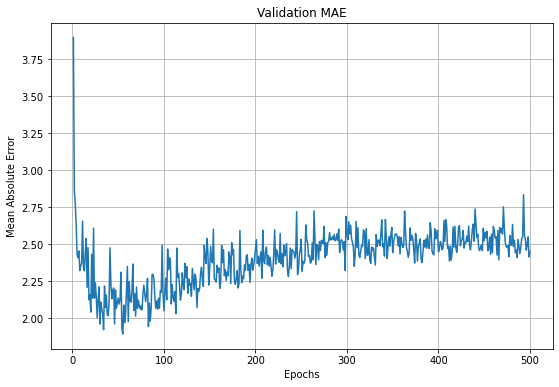

In [42]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

In [43]:
Hist_boston.history['val_mae'][:5]

[3.896170139312744,
 2.864288568496704,
 2.77820086479187,
 2.6413445472717285,
 2.433683156967163]

* 5번째 이후 MAE 확인

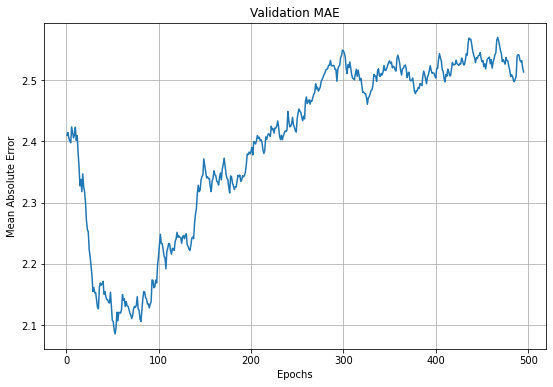

In [44]:
####함수 이해#######
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

#조기종료 필요

> ## 6) Keras Session Clear

In [45]:
from tensorflow.keras import backend as K

K.clear_session()

# IV. Early Stopping

> ## 1) Model Define & Compile

In [46]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 2) EarlyStopping( ) : 특정 시점 멈춤

* monitor : 모니터링 대상 성능
* mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
* patience : 성능이 개선되지 않는 epoch 횟수

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae', 
                   mode = 'min', 
                   patience = 50, 
                   verbose = 1)

> ## 3) ModelCheckpoint( ) : 모델을 저장할 때 사용되는 콜백함수

* 'best_boston.h5' : 최적모델이 저장될 경로
* save_best_only : 최적모델만 저장할지 지정

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston_house.h5',  # 코랩 왼쪽 파일에 저장
                     monitor = 'val_mae', 
                     mode = 'min', 
                     save_best_only = True,
                     verbose = 1)

> ## 4) Model Fit with callbacks

* callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정

In [54]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
295/323 [==========================>...] - ETA: 0s - loss: 4.0836 - mae: 1.3094
Epoch 00001: val_mae improved from inf to 2.25543, saving model to best_boston_house.h5
323/323 [==============================] - 1s 2ms/step - loss: 4.1680 - mae: 1.3337 - val_loss: 9.8747 - val_mae: 2.2554
Epoch 2/500
316/323 [============================>.] - ETA: 0s - loss: 4.0216 - mae: 1.3197
Epoch 00002: val_mae did not improve from 2.25543
323/323 [==============================] - 1s 2ms/step - loss: 3.9952 - mae: 1.3225 - val_loss: 10.4230 - val_mae: 2.3179
Epoch 3/500
313/323 [============================>.] - ETA: 0s - loss: 4.1798 - mae: 1.3265
Epoch 00003: val_mae improved from 2.25543 to 2.23408, saving model to best_boston_house.h5
323/323 [==============================] - 1s 2ms/step - loss: 4.0909 - mae: 1.3158 - val_loss: 11.4968 - val_mae: 2.2341
Epoch 4/500
319/323 [============================>.] - ETA: 0s - loss: 3.9874 - mae: 1.3544
Epoch 00004: val_mae improved from 2.

> ## 5) Best Model

In [55]:
!ls -l

total 152
-rw-r--r-- 1 root root 71112 Dec 23 11:24 best_boston.h5
-rw-r--r-- 1 root root 71112 Dec 23 11:56 best_boston_house.h5
drwxr-xr-x 3 root root  4096 Dec 23 11:49 drive
drwxr-xr-x 1 root root  4096 Dec  3 14:33 sample_data


> ## 6) Model Evaluate

In [58]:
from tensorflow.keras.models import load_model

best_boston = load_model('best_boston_house.h5')

In [59]:
test_mse_score, test_mae_score = best_boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 16ms/step - loss: 21.4512 - mae: 2.4489
MAE is : 2.448857545852661


# 
# 
# 
# The End
# 
# 
# 